<h2> A. Library Import </h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import os
import warnings

warnings.filterwarnings('ignore')


In [ ]:
#type_of_target(Y_temp)

<h2>B. Function</h2>

<h3> B.1 .Find missing percentage value </h3>

In [ ]:
def missing_percent(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_table = pd.concat([mis_val, mis_percent], axis=1)
        # Rename the columns
        mis_columns = mis_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})
        # Sort the table by percentage of missing descending
        mis_columns = mis_columns[
            mis_columns.iloc[:,1] != 0].sort_values(
        'Percent of Total Values', ascending=False).round(2)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_columns.shape[0]) +
              " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_columns

<h3> B.2 KNN Imputer </h3>

* Use MinMaxScaler to scale X
* Use LabelBinarizer to convert multiclass Y to binary Y

In [ ]:
def optimize_knn_imputer(data, target,name):
    results = list()
    dict = {'Name':[],
        'K':[],
        'MeanAccuracy':[],
        'stdAccuracy':[]
       }
    df = pd.DataFrame(dict)
    for s in range(1, 50, 2):
        imputer = KNNImputer(n_neighbors=s, weights='distance', metric='nan_euclidean')
        array = data.values
        X = array [:,:-1]
        Y = data[target]
        
        #lb = preprocessing.LabelBinarizer()
        #Y_binary = lb.fit_transform(Y)
        #Y_binary = np.array([number[0] for number in lb.fit_transform(Y)])
        data['num'][data.num >0] = 1
        Y_temp = data['num']

    
        trans = MinMaxScaler()
        trans_X = trans.fit_transform(X)
        
        X_imputed = imputer.fit_transform(trans_X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)
        
        model = RandomForestClassifier()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_imputed, Y_temp, scoring='accuracy', cv=cv, n_jobs=-1)       
        results.append(scores)
        df.loc[len(df.index)] = [name, s, mean(scores), std(scores)] 
        #print('>K : %s --> Mean : %.3f --> Std : (%.3f)' % (s, mean(scores), std(scores)))   
    #max(results)
    display(df)
    pyplot.boxplot(results, labels=range(1, 50, 2), showmeans=True)
    pyplot.show()
    return df
    #df.loc[df['MeanAccuracy'] == df['MeanAccuracy'].max()] 

<h3> B.3 FinalDataset Prep </h3>

In [ ]:
def Final_Dataset_Prep(data, target , K):
    imputer = KNNImputer(n_neighbors=K, weights='distance', metric='nan_euclidean')
    array = data.values
    X = array[:,:-1]
    trans = MinMaxScaler()
    trans_X = trans.fit_transform(X)   
    X_imputed = imputer.fit_transform(trans_X)
    X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)

    data['num'][data.num >0] = 1
    Y_temp = data['num']
    Final_Dataset = pd.concat([d.reset_index(drop=True) for d in [X_imputed_df, Y_temp]], axis=1)
    return Final_Dataset

<h2> C . Import Data</h2>

In [ ]:
cleveland_file = "./processed.cleveland.data"
cleveland_df = pd.read_csv(cleveland_file, header=None)
cleveland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
cleveland_df = cleveland_df.replace('?', np.nan)


hungarian_file = "./processed.hungarian.data"
hungarian_df = pd.read_csv(hungarian_file, header=None)
hungarian_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
hungarian_df = hungarian_df.replace('?', np.nan)


switzerland_file = "./processed.switzerland.data"
switzerland_df = pd.read_csv(switzerland_file, header=None)
switzerland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
switzerland_df = switzerland_df.replace('?', np.nan)


va_file = "./processed.va.data"
va_df = pd.read_csv(va_file, header=None)
va_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
va_df = va_df.replace('?', np.nan)

<h2> D. Find Missing </h2>

In [ ]:
cleveland_nan = pd.DataFrame(cleveland_df.isnull().sum())
hungarian_nan = pd.DataFrame(hungarian_df.isnull().sum())
switzerland_nan = pd.DataFrame(switzerland_df.isnull().sum())
va_nan = pd.DataFrame(va_df.isnull().sum())

Disease_NAN = pd.concat([cleveland_nan, hungarian_nan, switzerland_nan, va_nan], axis=1)
Disease_NAN.columns = ["cleveland NAN", "hungarian NAN", "switzerland NAN", "va NAN"]
Disease_NAN

,cleveland NAN,hungarian NAN,switzerland NAN,va NAN
age,0,0,0,0
sex,0,0,0,0
cp,0,0,0,0
trestbps,0,1,2,56
chol,0,23,0,7
fbs,0,8,75,7
restecg,0,1,1,0
thalach,0,1,1,53
exang,0,1,1,53
oldpeak,0,0,6,56


<h2> E. Creating different Dataframe </h2>

Below are the combination of different dataset 
* Cleveland , hungarian , switzerland , Va
* Cleveland , hungarian  
* Cleveland , switzerland
* Cleveland , hungarian , switzerland
* Cleveland

We are trying to find best K value for KNN_Imputer by applying RandomforestClassifier to find bext accuracy

<h2> E.1 Cleveland + hungarian + switzerland + Va </h2>

In [ ]:
Heart_Disease_DF = pd.concat([cleveland_df,hungarian_df,switzerland_df,va_df])

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland+hungarian+switzerland+va,1.0,0.818478,0.026049
1,cleveland+hungarian+switzerland+va,3.0,0.831159,0.024099
2,cleveland+hungarian+switzerland+va,5.0,0.825000,0.033485
3,cleveland+hungarian+switzerland+va,7.0,0.821739,0.030564
4,cleveland+hungarian+switzerland+va,9.0,0.831159,0.028858
5,cleveland+hungarian+switzerland+va,11.0,0.821739,0.031578
6,cleveland+hungarian+switzerland+va,13.0,0.827536,0.034684
7,cleveland+hungarian+switzerland+va,15.0,0.827174,0.033836
8,cleveland+hungarian+switzerland+va,17.0,0.819928,0.030831
9,cleveland+hungarian+switzerland+va,19.0,0.825725,0.028550


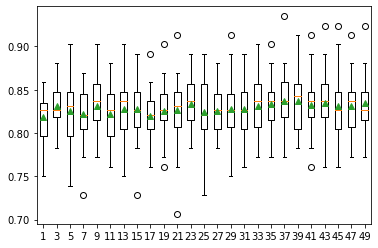

In [ ]:
df1 = optimize_knn_imputer(Heart_Disease_DF,'num','cleveland+hungarian+switzerland+va')

In [ ]:
df1.loc[df1['MeanAccuracy'] == df1['MeanAccuracy'].max()] 

,Name,K,MeanAccuracy,stdAccuracy
18,cleveland+hungarian+switzerland+va,37.0,0.836957,0.032244


<h2> E.2 Cleveland + hungarian </h2>

In [ ]:
Clev_hung_df = pd.concat([cleveland_df,hungarian_df])

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland+hungarian,1.0,0.829181,0.041638
1,cleveland+hungarian,3.0,0.839812,0.040478
2,cleveland+hungarian,5.0,0.836987,0.039494
3,cleveland+hungarian,7.0,0.837034,0.042754
4,cleveland+hungarian,9.0,0.835282,0.043256
5,cleveland+hungarian,11.0,0.835838,0.043305
6,cleveland+hungarian,13.0,0.838682,0.042666
7,cleveland+hungarian,15.0,0.841987,0.034118
8,cleveland+hungarian,17.0,0.831403,0.046563
9,cleveland+hungarian,19.0,0.841412,0.035037


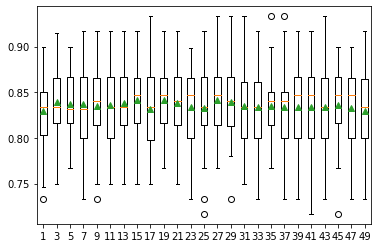

In [ ]:
df2 = optimize_knn_imputer(Clev_hung_df,'num','cleveland+hungarian')

In [ ]:
df2.loc[df2['MeanAccuracy'] == df2['MeanAccuracy'].max()] 

,Name,K,MeanAccuracy,stdAccuracy
7,cleveland+hungarian,15.0,0.841987,0.034118


<h2> E.3 Cleveland + switzerland </h2>

In [ ]:
Clev_switz_df = pd.concat([cleveland_df,switzerland_df])

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland+switzerland,1.0,0.842802,0.054934
1,cleveland+switzerland,3.0,0.850535,0.054618
2,cleveland+switzerland,5.0,0.856035,0.055246
3,cleveland+switzerland,7.0,0.852159,0.061662
4,cleveland+switzerland,9.0,0.853636,0.057098
5,cleveland+switzerland,11.0,0.848191,0.064890
6,cleveland+switzerland,13.0,0.856035,0.053589
7,cleveland+switzerland,15.0,0.854448,0.054154
8,cleveland+switzerland,17.0,0.862994,0.063609
9,cleveland+switzerland,19.0,0.854411,0.059374


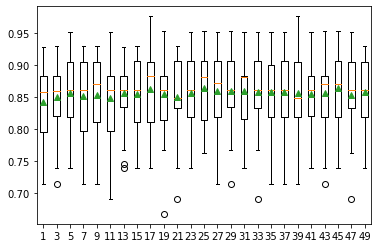

In [ ]:
df3 = optimize_knn_imputer(Clev_switz_df,'num','cleveland+switzerland')

In [ ]:
df3.loc[df3['MeanAccuracy'] == df3['MeanAccuracy'].max()] 

,Name,K,MeanAccuracy,stdAccuracy
22,cleveland+switzerland,45.0,0.864636,0.055006


<h2> E.4 Cleveland + switzerland + hungarian</h2>

In [ ]:
Clev_hung_switz_df = pd.concat([cleveland_df,hungarian_df,switzerland_df])

In [ ]:
df4 = optimize_knn_imputer(Clev_hung_switz_df,'num','cleveland+hungarian+switzerland')

In [ ]:
df4.loc[df4['MeanAccuracy'] == df4['MeanAccuracy'].max()] 

<h2> E.5 Cleveland </h2>

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland,1.0,0.817312,0.052011
1,cleveland,3.0,0.820538,0.052675
2,cleveland,5.0,0.817348,0.051570
3,cleveland,7.0,0.817491,0.053115
4,cleveland,9.0,0.825125,0.045702
5,cleveland,11.0,0.827168,0.046075
6,cleveland,13.0,0.831649,0.049211
7,cleveland,15.0,0.827097,0.050796
8,cleveland,17.0,0.830466,0.057809
9,cleveland,19.0,0.829427,0.049927


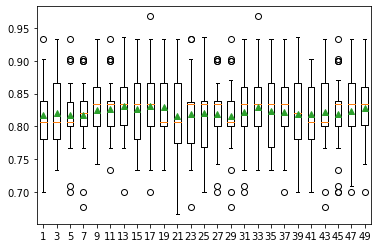

In [ ]:
df5 = optimize_knn_imputer(cleveland_df,'num','cleveland')

In [ ]:
df5.loc[df5['MeanAccuracy'] == df5['MeanAccuracy'].max()] 

,Name,K,MeanAccuracy,stdAccuracy
6,cleveland,13.0,0.831649,0.049211


<h2> E . Final Imputation DataSet </h2>

In [ ]:
df1_max = df1.loc[df1.sort_values(by='K', ascending=False)['MeanAccuracy'] == df1.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df2_max = df2.loc[df2.sort_values(by='K', ascending=False)['MeanAccuracy'] == df2.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df3_max  = df3.loc[df3.sort_values(by='K', ascending=False)['MeanAccuracy'] == df3.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df4_max  = df4.loc[df4.sort_values(by='K', ascending=False)['MeanAccuracy'] == df4.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df5_max  = df5.loc[df5.sort_values(by='K', ascending=False)['MeanAccuracy'] == df5.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 

Optimum_df = pd.concat([df1_max,df2_max,df3_max,df4_max,df5_max])
Optimum_df.reset_index().sort_values(by='MeanAccuracy', ascending=False, na_position='first')

In [ ]:
data = Clev_hung_switz_df
target = 'num'
K = 3

Final_DF = Final_Dataset_Prep(data,target,K)

In [ ]:
Final_DF

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.714286,1.0,0.000000,0.541667,0.386401,1.000000,1.0,0.633803,0.0,0.556818,1.0,0.000000,0.750000,0
1,0.795918,1.0,1.000000,0.666667,0.474295,0.000000,1.0,0.338028,1.0,0.465909,0.5,1.000000,0.000000,1
2,0.795918,1.0,1.000000,0.333333,0.379768,0.000000,1.0,0.485915,1.0,0.590909,0.5,0.666667,1.000000,1
3,0.183673,1.0,0.666667,0.416667,0.414594,0.000000,0.0,0.894366,0.0,0.693182,1.0,0.000000,0.000000,0
4,0.265306,0.0,0.333333,0.416667,0.338308,0.000000,1.0,0.788732,0.0,0.454545,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.857143,1.0,1.000000,0.291667,0.000000,0.000000,0.5,0.225352,1.0,0.295455,0.5,0.333333,1.000000,1
716,0.857143,1.0,1.000000,0.500000,0.000000,1.000000,0.0,0.683099,1.0,0.522727,0.5,0.304230,1.000000,1
717,0.897959,1.0,0.666667,0.666667,0.000000,0.328777,1.0,0.380282,0.0,0.477273,0.5,0.666667,0.834796,0
718,0.918367,0.0,0.666667,0.666667,0.000000,0.000000,0.5,0.429577,0.0,0.295455,0.0,0.101401,0.000000,1


In [ ]:
final_df_nan = pd.DataFrame(Final_DF.isnull().sum())
final_df_nan

In [ ]:
Final_DF.to_csv(r'.\Final_Dataset.csv', index = False, header=True)